In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
plt.rcParams['figure.figsize'] = (16,9)
sns.set()

In [51]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

def sigmoid_derivative(x):
    ### x = sigmoid(x) , s'(x) = s(x)(1 - s(x))
    return x * (1.0 - x)



In [19]:
xx = np.linspace(-100, 100 , 1000)


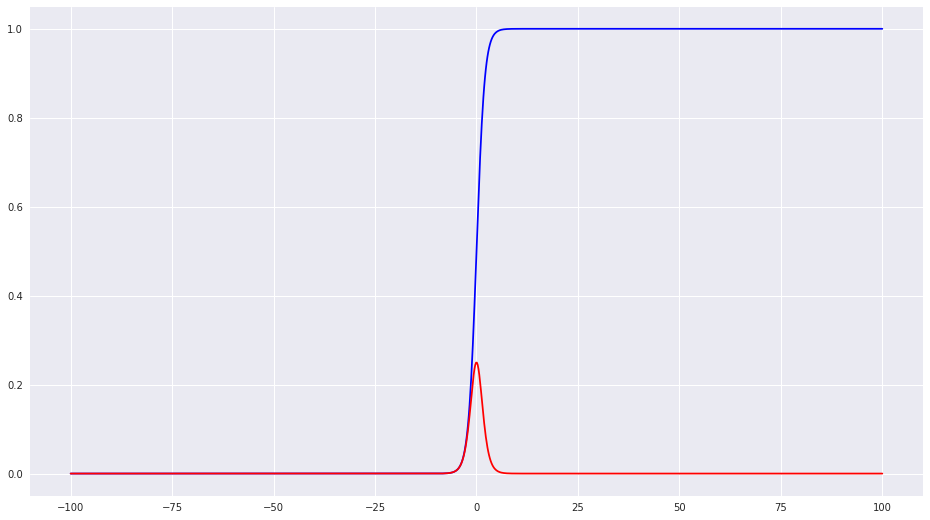

In [24]:
plt.plot(xx,sigmoid(xx),'b-')
plt.plot(xx,sigmoid_derivative(sigmoid(xx)),'r-')
plt.show()

## Neural Networks consist of the following components

* An input layer, x
* An arbitrary amount of hidden layers
* An output layer, ŷ
* A set of weights and biases between each layer, W and b
* A choice of activation function for each hidden layer, σ. In this tutorial, we’ll use a Sigmoid activation function.
* The diagram below shows the architecture of a 2-layer Neural Network (note that the input layer is typically excluded when counting the number of layers in a Neural Network)

![](https://cdn-images-1.medium.com/max/800/1*sX6T0Y4aa3ARh7IBS_sdqw.png)

### Training the Neural Network

The output ŷ of a simple 2-layer Neural Network is:

$$ y = \sigma{(W_2\sigma{(W_1 x + b_1)} + b_2)}  $$


You might notice that in the equation above, the weights W and the biases b are the only variables that affects the output ŷ.

Naturally, the right values for the weights and biases determines the strength of the predictions. The process of fine-tuning the weights and biases from the input data is known as training the Neural Network.


Each iteration of the training process consists of the following steps:

* Calculating the predicted output ŷ, known as feedforward
* Updating the weights and biases, known as backpropagation.

The sequential graph below illustrates the process.

![](https://cdn-images-1.medium.com/max/800/1*CEtt0h8Rss_qPu7CyqMTdQ.png)




### Backpropagation

![](https://cdn-images-1.medium.com/max/1800/1*7zxb2lfWWKaVxnmq2o69Mw.png)

In [52]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(self.y.shape)
        
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input , self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1 , self.weights2))
        return self.layer2

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T , (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T , (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) *  sigmoid_derivative(self.layer1)))
        
        #update the weights with the derivative (slope)  of the loss function                   
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        
    def train(self):
        self.output = self.feedforward()
        self.backprop()
        
   

## Loss Function
There are many available loss functions, and the nature of our problem should dictate our choice of loss function. In this tutorial, we’ll use a simple sum-of-sqaures error as our loss function.




sum - of -squares  Error = sum(y-y)^2 

In [53]:
# Define dataset
X = np.array(([1, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]), dtype = float)
y = np.array(([0], [1], [1], [0]), dtype = float)

# Train
NN = NeuralNetwork(X , y)
for i in range(1000):
    if i % 100 == 0 :
        print(f'''For iteration {i} \n Input:{X} \n Actual Output : {y} \n   
        Predicted Output : {NN.feedforward()} \n Loss: {np.mean(np.square(y)- NN.feedforward())} ''')
        
    NN.train()

For iteration 0 
 Input:[[1. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]] 
 Actual Output : [[0.]
 [1.]
 [1.]
 [0.]] 
   
        Predicted Output : [[0.7883838 ]
 [0.79467201]
 [0.7883838 ]
 [0.81517954]] 
 Loss: -0.29665478594769135 
For iteration 100 
 Input:[[1. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]] 
 Actual Output : [[0.]
 [1.]
 [1.]
 [0.]] 
   
        Predicted Output : [[0.47645885]
 [0.87972053]
 [0.47645885]
 [0.1739196 ]] 
 Loss: -0.001639456886734128 
For iteration 200 
 Input:[[1. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]] 
 Actual Output : [[0.]
 [1.]
 [1.]
 [0.]] 
   
        Predicted Output : [[0.49578437]
 [0.94018359]
 [0.49578437]
 [0.07817594]] 
 Loss: -0.002482069623474758 
For iteration 300 
 Input:[[1. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]] 
 Actual Output : [[0.]
 [1.]
 [1.]
 [0.]] 
   
        Predicted Output : [[0.49801179]
 [0.95720114]
 [0.49801179]
 [0.05467904]] 
 Loss: -0.0019759418771202446 
For iteration 400 
 Input:[[1. 0. 1.]
 [0. 1. 1.]
